Contexte du projet
------------------

Vous ne révez plus... vous venez de faire le plein de ressources... 
Aujourd'ui vous allez créer votre premier labyrinthe !!

Un labyrinthe est un ensemble complexe de chemins tortueux, à embranchements multiples, dans lequel on peut tourner en rond et se perdre. 
Il existe un point d’entrée et aussi une issue qu’il convient d’atteindre, cette dernière pouvant être confondue avec le point d’entrée. 
On peut aussi placer en un certain endroit un objet qu’il s’agit d’atteindre. 
Dans tous les cas, on doit trouver un moyen d’explorer le labyrinthe en passant partout de façon systématique, du moins jusqu’à l’issue finale, en évitant de refaire plusieurs fois le même chemin ou de tourner en rond. 
Pour s’en sortir, on connaît le fil d’Ariane, les cailloux disposés sur son chemin par le Petit Poucet, ou la stratégie qui consiste à toujours longer les murs que l’on a à sa droite (ou à sa gauche si l’on préfère). 
Mais tout cela demande à être précisé.

Le but de ce projet est de créer un code python qui va générer aléatoirement des grilles de labyrinthe, qui va être capable de trouver la solution de celles-ci, si elle existe (eh oui, il se peut qu'un labyrinthe soit insoluble!), et qui pourra afficher tout ça sous la forme d’une image !

On a appris à parcourir un arbre, en choisissant par exemple d’aller à droite lorsque plusieurs bifurcations se présentent, et en faisant demi-tour lorsqu’on atteint une feuille de l’arbre. 
Pour résoudre un labyrinthe, l’approche est similaire. Pour cela considérons un objet mobile en forme de carré, caractérisé par sa position (x, y) et dirigé dans une certaine direction, celle qu’il a devant lui. 
A partir de cette direction, l’objet mobile peut soit garder cette direction, soit faire un quart de tour à droite, soit faire un quart de tour à gauche, soit faire demi-tour. 
Pour respecter les conditions de l’exploration, il va privilégier de tourner à droite, mais s’il tombe sur un mur, il choisira d’aller devant, et s’il tombe encore sur un mur, il ira à gauche. 
Enfin, s’il tombe sur un cul-de-sac, il fera demi-tour.

« Dans le labyrinthe, tu ne te perds pas... tu te retrouves »


### 1. Generating Maze

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random

random.seed(4) #Fixer le rendu pour tests

In [3]:
class Maillon:

    def __init__(self, valeur, suivant=None):
        self.valeur = valeur
        self.suivant = suivant

class Pile:

    def __init__(self):
        self.taille = 0 # nombre d'assiettes dans la pile
        self.sommet = None

    def empiler(self, valeur):
        self.sommet = Maillon(valeur, self.sommet)
        self.taille += 1

    def depiler(self):
        if self.taille > 0:
            valeur = self.sommet.valeur
            self.sommet = self.sommet.suivant
            self.taille -= 1
            return valeur

    def estVide(self):
        return self.taille == 0

    def lireSommet(self):
        return self.sommet.valeur
    


#### Function that return the neighbour's list

In [4]:
# Grid's size
#LARGEUR = 30
#HAUTEUR = 30
HAUTEUR = LARGEUR = 10

def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    i, j = couple[0], couple[1]
    #print(f"fct voisinage / avant boucle for: i: {i} j: {j} couple: {couple}") #Debug
    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if   -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
        #print(f"fct voisinage / pendat boucle for: i: {i} j: {j} d: {d} i+d:{i+d} j+d:{j+d}") #Debug
    #print(f"fct voisinage / aprés boucle for: i: {i} j: {j} listeVoisin: {listeVoisins}\n") #Debug
    return listeVoisins

#### The course of the map : Depth First Search

In [5]:
def dfs(s) :
    P = {s: None}
    Q = Pile()
    Q.empiler(s)
    while not(Q.estVide()) :
        u = Q.lireSommet()
        R=[y for y in voisinage(u) if y not in P]
        if R :
            v=random.choice(R)
            P[v]=u
            Q.empiler(v)
        else :
            Q.depiler()
    return P

#### 1.1 Drawing the maze

In [6]:
def dedale():
    """
    Drawing the result
    """
    labyrinthe = [ [0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)]
    parcours = dfs((0,0))

    #print(f"fct dédale:\n(\nlabyrinthe: \n{labyrinthe})\nparcours: \n{parcours}\n)") #Debug
    #plt.imshow(labyrinthe)
    
    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 1
        if (i,j) !=  (0,0):
            #print(f"test: i: {i} j: {j}")
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 1
            labyrinthe[i+k+1][j+l+1] = 1
            
    #print(f"après fct dédale:\n(\nlabyrinthe: \n{labyrinthe})\nparcours: \n{parcours}\n)") #Debug
    #plt.imshow(labyrinthe)

    labyrinthe[0][1] = 1 # Entry's draw checkpoint fixed
    labyrinthe[2*HAUTEUR][2*LARGEUR-1] = 1 #Exit's draw checkpoint fixed
    
    #print(f"Labyrinthe jaune:\n(\nlabyrinthe: \n{labyrinthe})\nparcours: \n{parcours}\n)") #Debug
    return labyrinthe

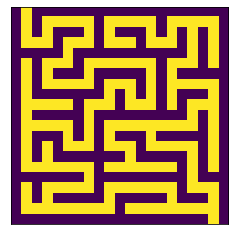

In [7]:
def affichage(labyrinthe):
    
    # On dessine le labyrinthe:
    plt.imshow(labyrinthe)
    
    # on cache les graduations:
    plt.xticks([])
    plt.yticks([])
    
    # on visualise le résultat:
    plt.show()
    
    #print('[LABYRINTH] =') #Debug
    #print('\n'.join([''.join(['{:4}'.format(item) for item in row]) #Debug
    # for row in labyrinthe])) #Debug

labyrinthe = dedale()
affichage(labyrinthe)

#### This drawing is done with a list
##### We need to transform it into matrix to use Networkx and shows the graph
#####

In [8]:
maze = labyrinthe
mazeArray = np.array(maze)
#maze

#### Using Networkx

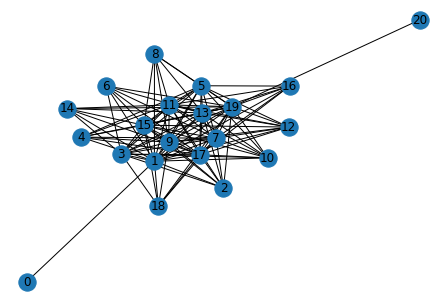

In [9]:
graph = nx.from_numpy_matrix(mazeArray)
nx.draw(graph, with_labels = 1)

In [10]:
res = {idx+1:graph[idx] for idx in range(len(graph))}
#res

## Try to find a solution with iterations from upper entry to lower exit
#### (This method is partial because we can just work on small matrix and solutions can't be found)

In [11]:
# https://www.geeksforgeeks.org/python-program-for-rat-in-a-maze-backtracking-2/

N = len(maze)
  
# A utility function to print solution matrix sol 
def printSolution( sol ): 
      
    for i in sol: 
        for j in i: 
            print(str(j) + " ", end ="") 
        print("") 
  
# A utility function to check if x, y is valid 
# index for N * N Maze 
def isSafe( maze, x, y ): 
      
    if x >= 0 and x < N and y >= 0 and y < N and maze[x][y] == 1: 
        return True
      
    return False
  
""" This function solves the Maze problem using Backtracking.  
    It mainly uses solveMazeUtil() to solve the problem. It  
    returns false if no path is possible, otherwise return  
    true and prints the path in the form of 1s. Please note 
    that there may be more than one solutions, this function 
    prints one of the feasable solutions. """

def solveMaze( maze ): 
      
    sol = [ [ 0 for j in range(N) ] for i in range(N) ] 
      
    if solveMazeUtil(maze, 0, 1, sol) == False: #Entry point for the solution
        print("Solution doesn't exist"); 
        return False
      
    printSolution(sol) 
    return True
      
# A recursive utility function to solve Maze problem 
def solveMazeUtil(maze, x, y, sol): 
      
    # if (x, y is goal) return True 
    if x == N - 1 and y == N - 2: # Exit point for the solution
        sol[x][y] = 1
        return True
          
    # Check if maze[x][y] is valid 
    if isSafe(maze, x, y) == True: 
        # mark x, y as part of solution path 
        sol[x][y] = 1
          
        # Move forward in x direction 
        if solveMazeUtil(maze, x + 1, y, sol) == True:
            return True
        
        # If moving in x direction doesn't give solution  
        # then Move down in y direction 
        if solveMazeUtil(maze, x, y + 1, sol) == True: 
            return True
          
        # If none of the above movements work then  
        # BACKTRACK: unmark x, y as part of solution path 
        sol[x][y] = 0
        return False
              
x = solveMaze(maze)

Solution doesn't exist


#### Trying to use another solution : https://levelup.gitconnected.com/solve-a-maze-with-python-e9f0580979a1
 
#### but we need to switch boolean in matrix

In [12]:
mazeArray

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

In [13]:
#mazeArray2 = [j== 0  for i in mazeArray for j in mazeArray[i]] 
mazeArray2 = np.logical_not(mazeArray).astype(int)

In [14]:
mazeArray2

array([[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [15]:
a = mazeArray2

In [42]:
# https://levelup.gitconnected.com/solve-a-maze-with-python-e9f0580979a1

from PIL import Image, ImageDraw
images = []

zoom = 15
borders = 2

start = 0,1
end = len(mazeArray) - 1,len(mazeArray) - 2

def make_step(k):
  for i in range(len(m)):
    for j in range(len(m[i])):
      if m[i][j] == k:
        if i>0 and m[i-1][j] == 0 and a[i-1][j] == 0:
          m[i-1][j] = k + 1
        if j>0 and m[i][j-1] == 0 and a[i][j-1] == 0:
          m[i][j-1] = k + 1
        if i<len(m)-1 and m[i+1][j] == 0 and a[i+1][j] == 0:
          m[i+1][j] = k + 1
        if j<len(m[i])-1 and m[i][j+1] == 0 and a[i][j+1] == 0:
           m[i][j+1] = k + 1

def print_m(m):
    for i in range(len(m)):
        for j in range(len(m[i])):
            print( str(m[i][j]).ljust(2),end=' ')
        print()

def draw_matrix(a,m, the_path = []):
    im = Image.new('RGB', (zoom * len(a[0]), zoom * len(a)), (255, 0, 0))
    draw = ImageDraw.Draw(im)
    for i in range(len(a)):
        for j in range(len(a[i])):
            color = (255, 255, 0) # Way (of life) color
            r = 0
            if a[i][j] == 1:
                color = (78, 4, 71) # Wall color
            if i == start[0] and j == start[1]:
                color = (0, 255, 0)
                r = borders
            if i == end[0] and j == end[1]:
                color = (0, 255, 0)
                r = borders
            draw.rectangle((j*zoom+r, i*zoom+r, j*zoom+zoom-r-1, i*zoom+zoom-r-1), fill=color)
            if m[i][j] > 0:
                r = borders
                draw.ellipse((j * zoom + r, i * zoom + r, j * zoom + zoom - r - 1, i * zoom + zoom - r - 1),
                               fill=(255,0,0))
    for u in range(len(the_path)-1):
        y = the_path[u][0]*zoom + int(zoom/2)
        x = the_path[u][1]*zoom + int(zoom/2)
        y1 = the_path[u+1][0]*zoom + int(zoom/2)
        x1 = the_path[u+1][1]*zoom + int(zoom/2)
        draw.line((x,y,x1,y1), fill=(255, 0,0), width=5)
    draw.rectangle((0, 0, zoom * len(a[0]), zoom * len(a)), outline=(0,255,0), width=2)
    images.append(im)


m = []
for i in range(len(a)):
    m.append([])
    for j in range(len(a[i])):
        m[-1].append(0)
i,j = start
m[i][j] = 1

k = 0
while m[end[0]][end[1]] == 0:
    k += 1
    make_step(k)
    draw_matrix(a, m)


i, j = end
k = m[i][j]
the_path = [(i,j)]
while k > 1:
  if i > 0 and m[i - 1][j] == k-1:
    i, j = i-1, j
    the_path.append((i, j))
    k-=1
  elif j > 0 and m[i][j - 1] == k-1:
    i, j = i, j-1
    the_path.append((i, j))
    k-=1
  elif i < len(m) - 1 and m[i + 1][j] == k-1:
    i, j = i+1, j
    the_path.append((i, j))
    k-=1
  elif j < len(m[i]) - 1 and m[i][j + 1] == k-1:
    i, j = i, j+1
    the_path.append((i, j))
    k -= 1
  draw_matrix(a, m, the_path)

for i in range(10):
    if i % 2 == 0:
        draw_matrix(a, m, the_path)
    else:
        draw_matrix(a, m)
print('The maze : ')
print(mazeArray)
print('The Depth First Search :')
print_m(m)
print('_' * 40)
print('the path :\n', the_path)

images[0].save('maze.gif',
               save_all=True, append_images=images[1:],
               optimize=False, duration=20, loop=0)

The maze : 
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0]
 [0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0]
 [0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0]
 [0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0]
 [0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0]
 [0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0]
 [0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0]
 [0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
The Depth First Search :
0  1  0  0  0  0 

In [43]:
from IPython.display import Image
print('Different DFS paths + the way to exit')
print("="*37)
Image(url='maze.gif')

Different DFS paths + the way to exit
